## Medical Cost Prediction
 * (Healthcare Domain)

### Business/Domain Understanding
 #### What is Insurance?
   * Insurance is a contract between two parties whereby one party agrees to undertake the risk of the      other in exchange for consideration known as premium and promises to indemnify the party on the        happening of an uncertain event.

#### What is health insurance?
   * A plan that covers or shares the expenses associated with health care can be described as health      insurance.

#### Health insurance in India is an emerging insurance sector after the term life insurance and automobile insurance sector. Rise in the middle class, higher hospitalization cost, expensive health care, digitization and increase in awareness level are some important drivers for the growth of the health insurance market in India.

### Task
 * How to split the given data into Train and Test?

 * How to perform Data Preparation on -

 * Categorical Columns - OneHotEncoding and LabelEncoding

 * Numerical Columns - Standardization and Normalization

 * How to build ML models that can predict medical costs billed by health insurance on an individual      given some features about the individual in the dataset.

#### Import the required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

####  Step - 1: Load the data and perform the basic EDA to understand the data.

In [14]:
Health_insurance=pd.read_csv(r'C:\Users\hp\Downloads\archive (9)\medical_insurance.csv')
Health_insurance.drop(Health_insurance.filter(regex="Unnamed"),axis=1, inplace=True)

In [15]:
Health_insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180
2768,21,female,34.600,0,no,southwest,2020.17700
2769,19,male,26.030,1,yes,northwest,16450.89470
2770,23,male,18.715,0,no,northwest,21595.38229


### Understand the Features
* age: age of primary beneficiary

* sex: insurance contractor gender, female, male

* bmi: Body mass index, providing an understanding of body, weights that are relatively high or low *   relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight,   ideally 18.5 to 24.9

* children: Number of dependents

* smoker: Smoking

* region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

* charges: Individual medical costs billed by health insurance

#### Checking the null values

In [16]:
Health_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [17]:
Health_insurance.describe().T

,count,mean,std,min,25%,50%,75%,max
age,2772.0,39.109668,14.081459,18.0000,26.000,39.00000,51.0000,64.00000
bmi,2772.0,30.701349,6.129449,15.9600,26.220,30.44750,34.7700,53.13000
children,2772.0,1.101732,1.214806,0.0000,0.000,1.00000,2.0000,5.00000
charges,2772.0,13261.369959,12151.768945,1121.8739,4687.797,9333.01435,16577.7795,63770.42801


In [18]:
Health_insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Machine Learning Model building
 * Build a system which can take features of Medical case(Health insurence) like age, sex, bmi,          children, smoker, region and predicts the charges of Medical case(Health insurence).

 * Target Variable:charges

In [19]:
num=Health_insurance.select_dtypes(include='number')
num

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
2767,47,45.320,1,8569.86180
2768,21,34.600,0,2020.17700
2769,19,26.030,1,16450.89470
2770,23,18.715,0,21595.38229


### Outliers detection

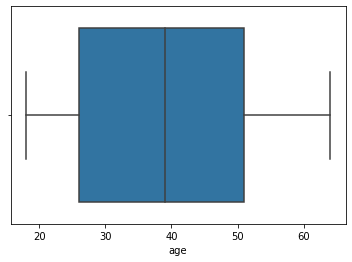

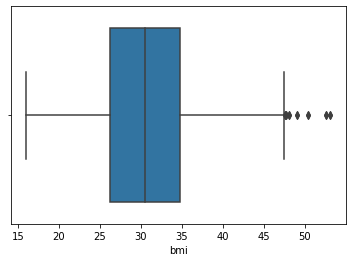

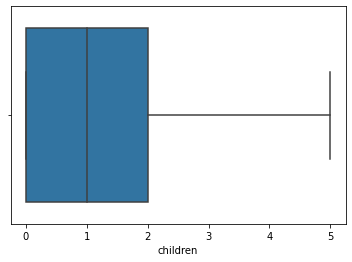

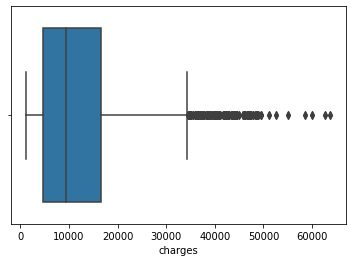

In [20]:
for i in num:
    sns.boxplot(Health_insurance[i])
    plt.show()

### Treating the Outliers by applying  IQR technique

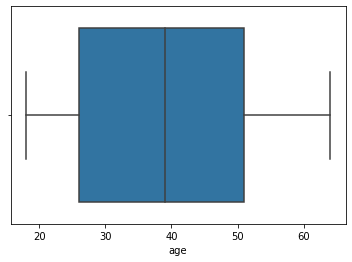

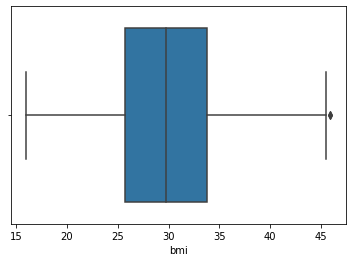

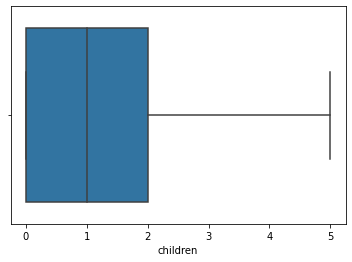

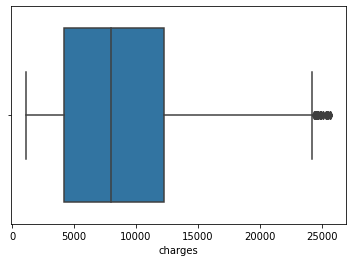

In [22]:
def out(col):
    q1 = Health_insurance[col].quantile(0.25)
    q3 = Health_insurance[col].quantile(0.75)
    IQR = q3-q1
    lb = q1-(1.5*IQR)
    
    ub = q3+(1.5*IQR)
    
    outliers = Health_insurance[(Health_insurance[col]<lb)|(Health_insurance[col]>ub)].index
    return outliers
for i in num:
    Health_insurance.drop(out(i),inplace=True)
    sns.boxplot(Health_insurance[i])
    plt.show()

#### Save the path into CSV file

In [27]:
import os
os.getcwd()
Health_insurance.to_csv('Health_insurance.csv')

In [28]:
Health_insurance=pd.read_csv("Health_insurance.csv")
Health_insurance.drop(Health_insurance.filter(regex="Unnamed"),axis=1, inplace=True)
Health_insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
2335,47,female,45.320,1,no,southeast,8569.86180
2336,21,female,34.600,0,no,southwest,2020.17700
2337,19,male,26.030,1,yes,northwest,16450.89470
2338,23,male,18.715,0,no,northwest,21595.38229


### Univariate Analysis
#### on Numerical features

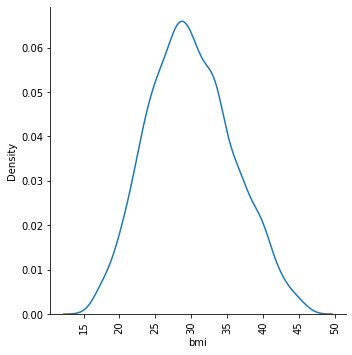

In [29]:
sns.displot(x=Health_insurance['bmi'],data=Health_insurance,kind='kde')
plt.xticks(rotation=90)   
plt.show()

#### Observation:
 * The density of body mass index is high weights at 20-40 that are relative to height

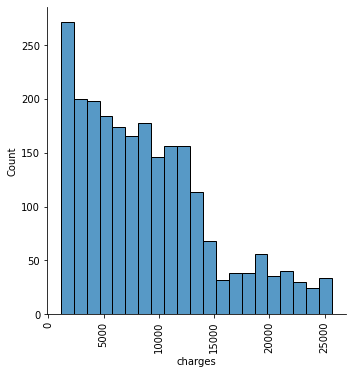

In [30]:
sns.displot(x=Health_insurance['charges'],data=Health_insurance,kind='hist')
plt.xticks(rotation=90)   
plt.show()

#### Observation:
 * The max charges of count below 5000

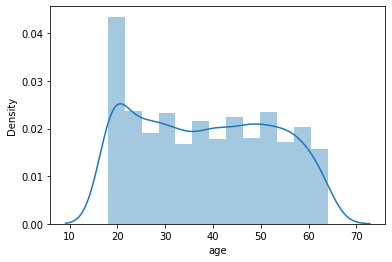

In [31]:
sns.distplot(Health_insurance['age'])
plt.show()

#### Observation
 * age of primary beneficiary is high dendity in the range 20-30.

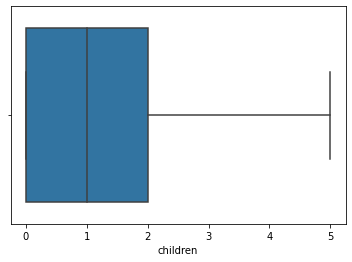

In [32]:
sns.boxplot(Health_insurance['children'])
plt.show()

#### Observation:
 * Here we observe that there is no outliers in boxplot and first quartile is 0 and third quartile is    2 and the upper bound is 5

#### on Categorical features

In [33]:
cat=Health_insurance.select_dtypes(exclude='number')
cat

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
2335,female,no,southeast
2336,female,no,southwest
2337,male,yes,northwest
2338,male,no,northwest


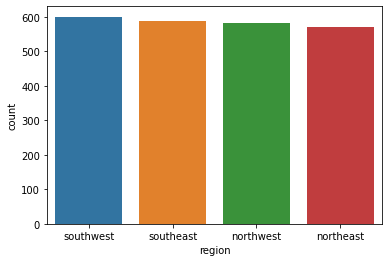

In [34]:
sns.countplot(Health_insurance['region']);

#### Observation:
 * The count is same in all regions.

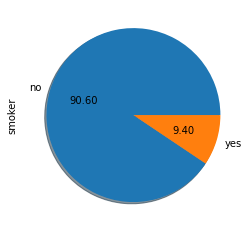

In [36]:
Health_insurance['smoker'].value_counts().plot(kind="pie",autopct="%.2f",shadow=True);

#### Observation:
 * smoker percentage is less compare to non smoker percentage

### Bivariate Analysis

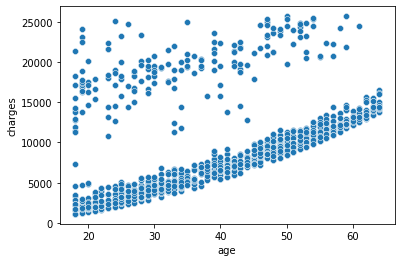

In [38]:
sns.scatterplot(x=Health_insurance['age'],y=Health_insurance['charges'],data=Health_insurance)
plt.show()

#### Observation:
 * Here if the age is increase the charges also increase.

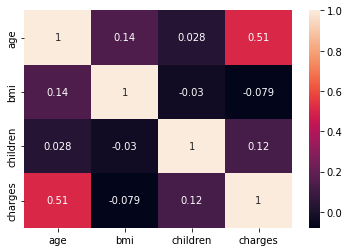

In [40]:
sns.heatmap(Health_insurance.corr(),annot=True)
plt.show()

#### Observation:
 * Here age and charges are mostly have positive correlation.means if the age is increase the charges are also increased.

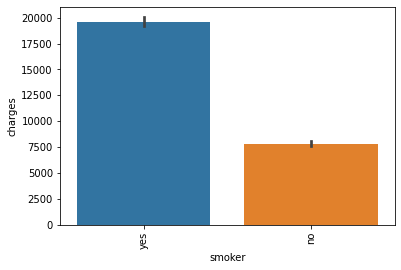

In [41]:
sns.barplot(x=Health_insurance['smoker'],y=Health_insurance['charges'],data=Health_insurance)
plt.xticks(rotation=90)
plt.show()

#### Observation:
 * Here we can say that the smoker have most charges.

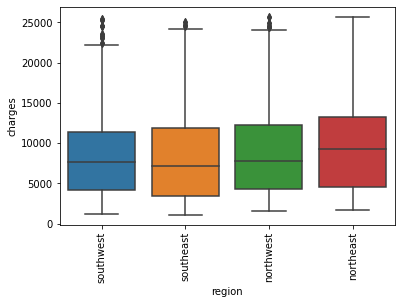

In [43]:
sns.boxplot(x=Health_insurance['region'],y=Health_insurance['charges'],data=Health_insurance)
plt.xticks(rotation=90)
plt.show()

#### Observation:
 * Here we can say that northeast region peoples billed more than 20000

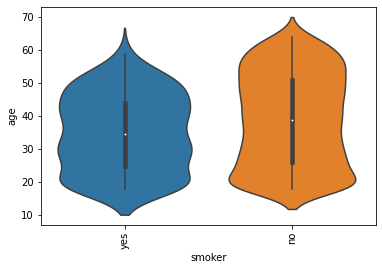

In [45]:
sns.violinplot(x=Health_insurance['smoker'],y=Health_insurance['age'],data=Health_insurance)
plt.xticks(rotation=90)
plt.show()

#### Observation:
 * The smoker age high density in the range between 20-40.

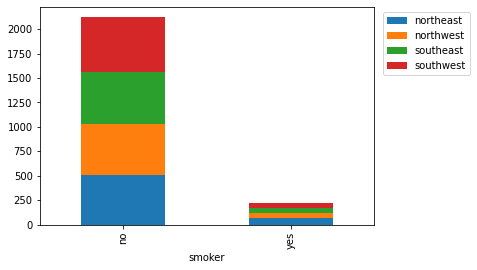

In [47]:
crosstab=pd.crosstab(Health_insurance['smoker'],Health_insurance['region'])
crosstab.plot(kind='bar',stacked=True)
plt.legend(bbox_to_anchor=(1.3,1))
plt.show()

#### Observation:
 * Here the smoker are less compare to non smokers region wise.

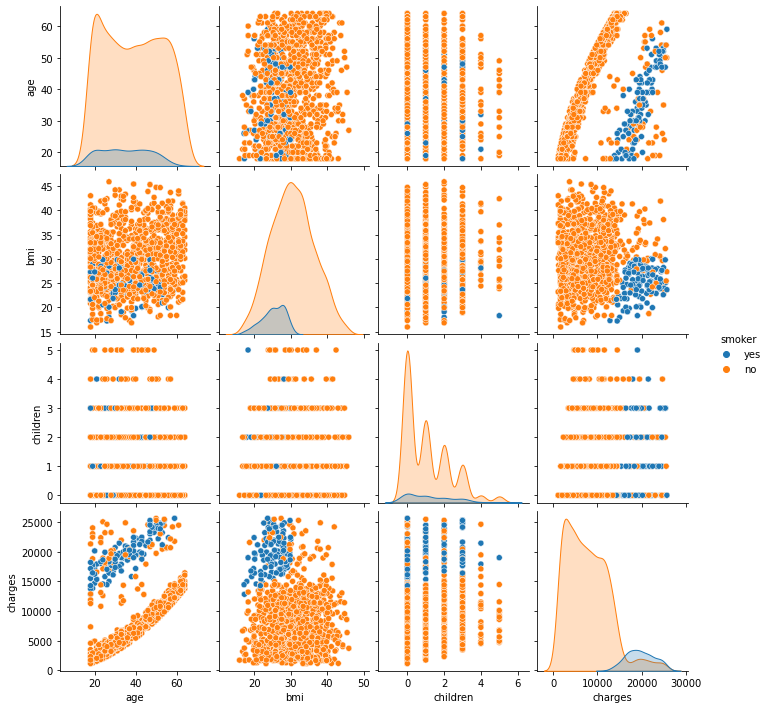

In [49]:
sns.pairplot(data=Health_insurance,hue='smoker')
plt.show()

### Step - 2: Document the below mentioned points properly:
 * Input variables:age,sex,bmi,children,smoker,region
 * Target variable:charges
 * Type:Supervised Learning(since target variable is given).
 * Task:Regression(The target variable is continous or realvalued).
 * Identify the Evaluation Metric.
    * regression task - Mean Absolute Error

In [50]:
X = Health_insurance[['age','sex','bmi','children','smoker','region']]
y = Health_insurance['charges']

In [51]:
Health_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2340 non-null   int64  
 1   sex       2340 non-null   object 
 2   bmi       2340 non-null   float64
 3   children  2340 non-null   int64  
 4   smoker    2340 non-null   object 
 5   region    2340 non-null   object 
 6   charges   2340 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 128.1+ KB


#### Step - 3: Split the dataset into Training and Testing (recommended 75:25 split).

In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.75,random_state=100)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(1755, 6) (1755,)
(585, 6) (585,)


#### Step - 4: Data preparation on train data:
 * For Numerical Variables - Standardization or Normalization (Fit and Transform)
 * For Categorical - LabelEncoding or OneHotEncoding (Choose wisely)

In [53]:
X_train_cat=X_train.select_dtypes(include='object')
X_train_num=X_train.select_dtypes(include=['float64','int64'])
print(X_train_cat.shape,X_train_num.shape)
X_test_cat=X_test.select_dtypes(include='object')
X_test_num=X_test.select_dtypes(include=['float64','int64'])
print(X_test_cat.shape,X_test_num.shape)

(1755, 3) (1755, 3)
(585, 3) (585, 3)


In [54]:
# scaling the numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_num_rescaled = pd.DataFrame(scaler.fit_transform(X_train_num), 
                                    columns = X_train_num.columns, 
                                    index = X_train_num.index)

X_train_num_rescaled.head()

,age,bmi,children
367,-1.183805,0.304726,-0.886700
354,-0.969290,0.107989,-0.886700
1147,-1.469824,1.700866,-0.886700
1732,-1.469824,0.637798,-0.886700
2305,0.961345,0.140778,-0.078306


In [58]:
# OneHotEncoding the categorical features

from sklearn.preprocessing import OneHotEncoder

encoder_ = OneHotEncoder(drop='first', sparse=False)

# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_cat_ohe = pd.DataFrame(encoder_.fit_transform(X_train_cat), 
                               columns=encoder_.get_feature_names_out(X_train_cat.columns), 
                               index = X_train_cat.index)

X_train_cat_ohe.head()

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
367,1.0,0.0,0.0,0.0,0.0
354,1.0,0.0,0.0,0.0,0.0
1147,0.0,0.0,0.0,1.0,0.0
1732,1.0,0.0,0.0,1.0,0.0
2305,0.0,0.0,0.0,0.0,0.0


In [59]:
X_train_transformed = pd.concat([X_train_num_rescaled, X_train_cat_ohe], axis=1)

X_train_transformed.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
367,-1.183805,0.304726,-0.886700,1.0,0.0,0.0,0.0,0.0
354,-0.969290,0.107989,-0.886700,1.0,0.0,0.0,0.0,0.0
1147,-1.469824,1.700866,-0.886700,0.0,0.0,0.0,1.0,0.0
1732,-1.469824,0.637798,-0.886700,1.0,0.0,0.0,1.0,0.0
2305,0.961345,0.140778,-0.078306,0.0,0.0,0.0,0.0,0.0


#### Step - 5: Data preparation on test data:
 * For Numerical Variables - Standardization (Transform)
 * For Categorical - LabelEncoding or OneHotEncoding (Choose wisely)

In [60]:
X_test_num_rescaled = pd.DataFrame(scaler.transform(X_test_num), 
                                   columns = X_test_num.columns, 
                                   index = X_test_num.index)

X_test_num_rescaled.head()

,age,bmi,children
134,0.603820,-0.301879,2.346877
1069,-0.754775,1.231459,-0.078306
913,1.747899,0.637798,1.538483
411,-1.398319,-0.218180,-0.886700
2332,1.104355,1.009699,1.538483


In [62]:
X_test_cat_ohe = pd.DataFrame(encoder_.fit_transform(X_test_cat), 
                               columns=encoder_.get_feature_names_out(X_test_cat.columns), 
                               index = X_test_cat.index)

X_test_cat_ohe.head()

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
134,1.0,0.0,0.0,0.0,0.0
1069,1.0,0.0,0.0,0.0,1.0
913,1.0,0.0,0.0,1.0,0.0
411,1.0,0.0,0.0,0.0,1.0
2332,0.0,0.0,1.0,0.0,0.0


In [63]:
X_test_transformed = pd.concat([X_test_num_rescaled, X_test_cat_ohe], axis=1)

X_test_transformed.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
134,0.603820,-0.301879,2.346877,1.0,0.0,0.0,0.0,0.0
1069,-0.754775,1.231459,-0.078306,1.0,0.0,0.0,0.0,1.0
913,1.747899,0.637798,1.538483,1.0,0.0,0.0,1.0,0.0
411,-1.398319,-0.218180,-0.886700,1.0,0.0,0.0,0.0,1.0
2332,1.104355,1.009699,1.538483,0.0,0.0,1.0,0.0,0.0


#### Step - 6: Model Training Phase - Use all the algorithms mentioned below to train separate models:
 * Linear Regression
 * KNN
 * Support Vector Machines
 * Decision Trees
 * Random Forest

#### Linear Regression

In [64]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_transformed, y_train)

LinearRegression()

In [65]:
y_test_pred = regressor.predict(X_test_transformed)

In [66]:
from sklearn import metrics
metrics.mean_absolute_error(y_test,y_test_pred)

1570.3632465873095

<AxesSubplot: xlabel='charges', ylabel='Count'>

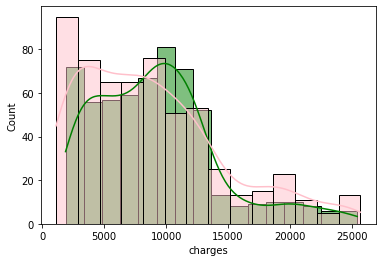

In [67]:
sns.histplot(y_test_pred,color='green',kde=True)
sns.histplot(y_test,color='pink',kde=True)

#### KNN Regression

In [69]:
from sklearn.neighbors import KNeighborsRegressor
KNN_regression=KNeighborsRegressor()
KNN_regression.fit(X_train_transformed,y_train)

KNeighborsRegressor()

In [68]:
y_test_pred=KNN_regression.predict(X_test_transformed)

In [70]:
from sklearn import metrics
metrics.mean_absolute_error(y_test,y_test_pred)

1751.9569241606837

<AxesSubplot: xlabel='charges', ylabel='Count'>

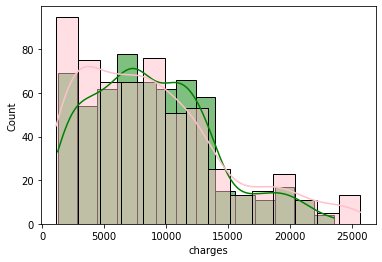

In [71]:
sns.histplot(y_test_pred,color='green',kde=True)
sns.histplot(y_test,color='pink',kde=True)

#### Support Vector Regression

In [72]:
from sklearn.svm import SVR
SV_regression=SVR()
SV_regression.fit(X_train_transformed,y_train)

SVR()

In [73]:
y_test_pred=SV_regression.predict(X_test_transformed)

In [74]:
from sklearn import metrics
metrics.mean_absolute_error(y_test,y_test_pred)

4467.05595500593

<AxesSubplot: xlabel='charges', ylabel='Count'>

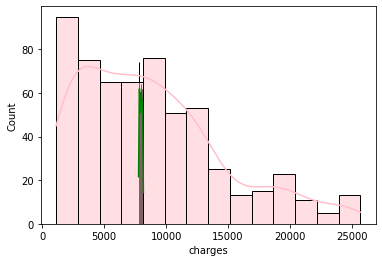

In [75]:
sns.histplot(y_test_pred,color='green',kde=True)
sns.histplot(y_test,color='pink',kde=True)

#### Decision Tree Regression

In [76]:
from sklearn.tree import DecisionTreeRegressor
DT_regression=DecisionTreeRegressor()
DT_regression.fit(X_train_transformed,y_train)

DecisionTreeRegressor()

In [77]:
y_test_pred=DT_regression.predict(X_test_transformed)

In [78]:
from sklearn import metrics
metrics.mean_absolute_error(y_test,y_test_pred)

373.1759515669516

<AxesSubplot: xlabel='charges', ylabel='Count'>

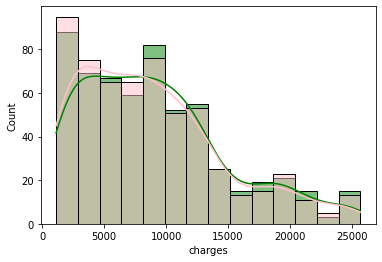

In [79]:
sns.histplot(y_test_pred,color='green',kde=True)
sns.histplot(y_test,color='pink',kde=True)

### Ensemble Techniques

#### Random Forest Regression

In [80]:
from sklearn.ensemble import RandomForestRegressor
Random_regression=RandomForestRegressor()
Random_regression.fit(X_train_transformed,y_train)

RandomForestRegressor()

In [81]:
y_test_pred=Random_regression.predict(X_test_transformed)

In [82]:
from sklearn import metrics
metrics.mean_absolute_error(y_test,y_test_pred)

875.1769808682153

<AxesSubplot: xlabel='charges', ylabel='Count'>

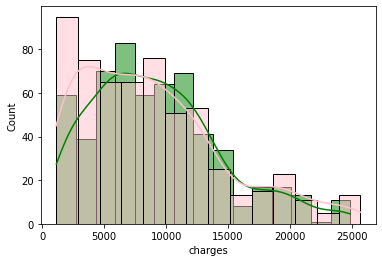

In [83]:
sns.histplot(y_test_pred,color='green',kde=True)
sns.histplot(y_test,color='pink',kde=True)

#### Adaboost Regression

In [84]:
from sklearn.ensemble import AdaBoostRegressor
ADA_regression=AdaBoostRegressor()
ADA_regression.fit(X_train_transformed,y_train)

AdaBoostRegressor()

In [85]:
y_test_pred=ADA_regression.predict(X_test_transformed)

In [86]:
from sklearn import metrics
metrics.mean_absolute_error(y_test,y_test_pred)

3297.878894034245

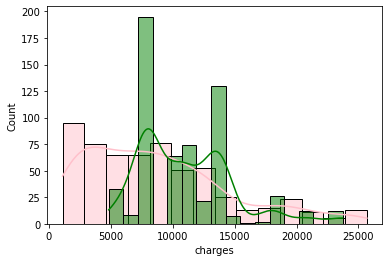

In [87]:
sns.histplot(y_test, color='pink',kde=True)
sns.histplot(y_test_pred, color='green',kde=True);

#### Gradiant boost decision tree Regression

In [88]:
from sklearn.ensemble import GradientBoostingRegressor
GBDT_regression=GradientBoostingRegressor()
GBDT_regression.fit(X_train_transformed,y_train)

GradientBoostingRegressor()

In [89]:
y_test_pred=GBDT_regression.predict(X_test_transformed)

In [90]:
from sklearn import metrics
metrics.mean_absolute_error(y_test,y_test_pred)

1372.8131558454074

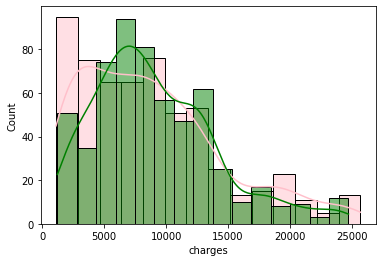

In [91]:
sns.histplot(y_test, color='pink',kde=True)
sns.histplot(y_test_pred, color='green',kde=True);

#### Step - 7: Comparing each algorithm's Mean Absolute Error

In [92]:
concate = pd.DataFrame({'Linear Regression':1570.3632465873095,'KNN Regression':1751.9569241606837,'Support Vector Regression':4467.05595500593,
                 'Decision Tree Regression':373.1759515669516,'Random Forest Regression':875.1769808682153,'Adaboost Regression':3297.878894034245,
                 'Gradiant boost decision tree Regression':1372.8131558454074},index=['Mean Absolute Error'])

In [94]:
concate.T

,Mean Absolute Error
Linear Regression,1570.363247
KNN Regression,1751.956924
Support Vector Regression,4467.055955
Decision Tree Regression,373.175952
Random Forest Regression,875.176981
Adaboost Regression,3297.878894
Gradiant boost decision tree Regression,1372.813156


#### Step - 8: Display a plot which shows all the algorithms applied along with the scores achieved.
 * Write your conclusion on the best algorithm for the Medical Cost Prediction problem.

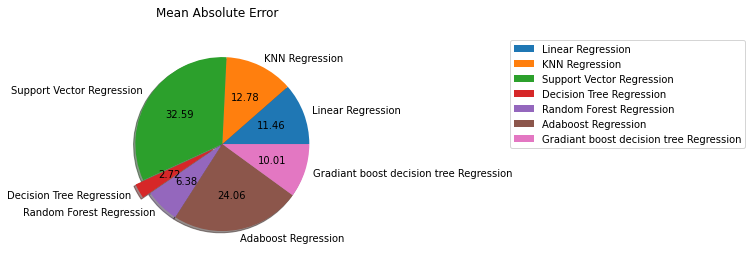

In [100]:
concate.T.plot(kind='pie',subplots=True,explode=[0,0,0,0.1,0,0,0],shadow = True,title='Mean Absolute Error',ylabel=' ',autopct='%.2f')
plt.legend(bbox_to_anchor=(1.8,1));

#### Conclusion
* Decision Tree Regerssion is performing extremely well on Medical Cost Prediction with error 2.72
* As well as Random Forest Regression sis also performing well with 6.38 error score